# Η Τιμή των Διαμαντιών

* Το παράδειγμα είναι βασισμένο στο κεφάλαιο 24 του βιβλίου των Hadley Wickham and Garrette Grolemund, [R for Data Science](https://r4ds.had.co.nz/).

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Θα διερευνήσουμε τους παράγοντες που επηρεάζουν την τιμή των διαμαντιών.

* Θα χρησιμοποιήσουμε ένα σύνολο δεδομένων που περιέχει τιμές διαμαντιών, μαζί με διάφορα χαρακτηριστικά τους.

In [1]:
import numpy as np
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt

from plotnine import *

import seaborn as sns

%matplotlib inline

In [2]:
from plotnine.data import diamonds
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


* Ας ξεκινήσουμε με την ποιότητα της κοπής σε σχέση με την τιμή, φτιάχνοντας μια σειρά από *θηκογράμματα* (boxplots).

* Tο θηκόγραμμα (boxplot) μας δείχνει:

  * τη διάμεσο 
  
  * το 25% και το 75% ποσοστημόριο
  
  * το εύρος των τιμών που κείτονται 1,5 φορά πάνω ή κάτω από τη θήκη (μουστάκια, whiskers)
  
  * έκτοπες τιμές.

* Φαίνεται ότι, περιέργως, όσο καλύτερη είναι η κοπή, τόσο μικρότερη είναι η τιμή.

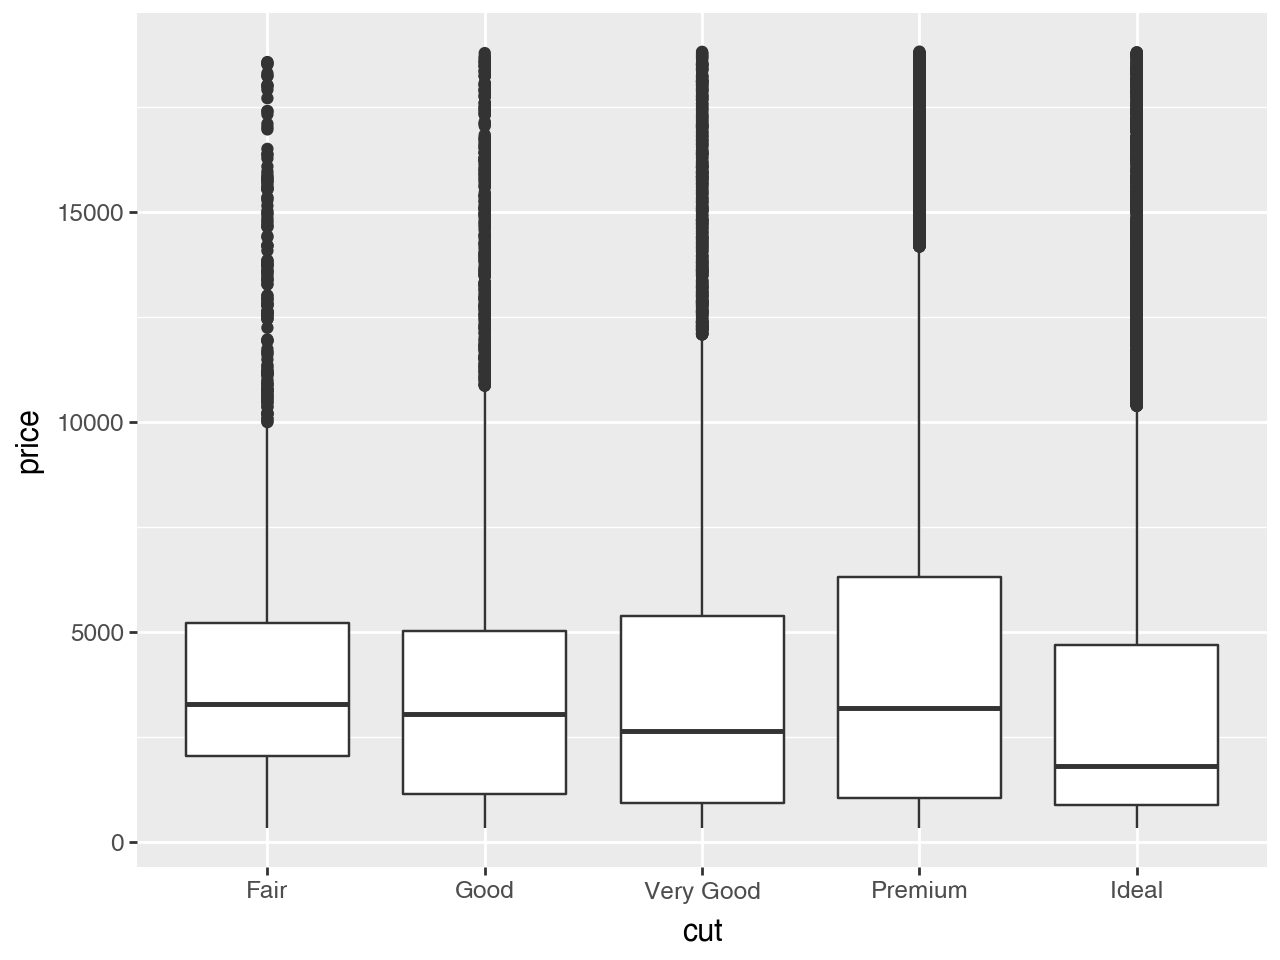

In [3]:
ggplot(diamonds, aes(x='cut', y='price')) + geom_boxplot()

* Το ίδιο διάγραμμα με το seaborn:

<Axes: xlabel='cut', ylabel='price'>

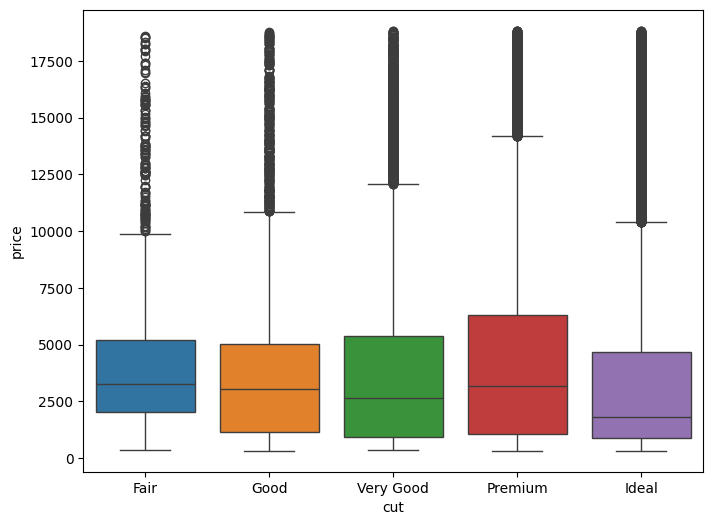

In [4]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='cut', y='price', hue='cut', data=diamonds)

* Στα διαμάντια, όσο λιγότερο χρώμα υπάρχει μέσα στο πετράδι, τόσο καλύτερη αξιολογείται η ποιότητά τους.

* Τα χρώματα περιγράφονται με μία κλίμακα γραμμάτων από το D στο J, με το D το καλύτερο (άχρωμο) και τα γράμματα να προχωρούν όσο αυξάνεται η παρουσία χρώματος στο πετράδι.

* Φαίνεται πάλι, παραδόξως, ότι τα χαμηλότερης ποιότητας διαμάντια, τουλάχιστον σύμφωνα με την παρουσία χρώματος, έχουν υψηλότερες τιμές.

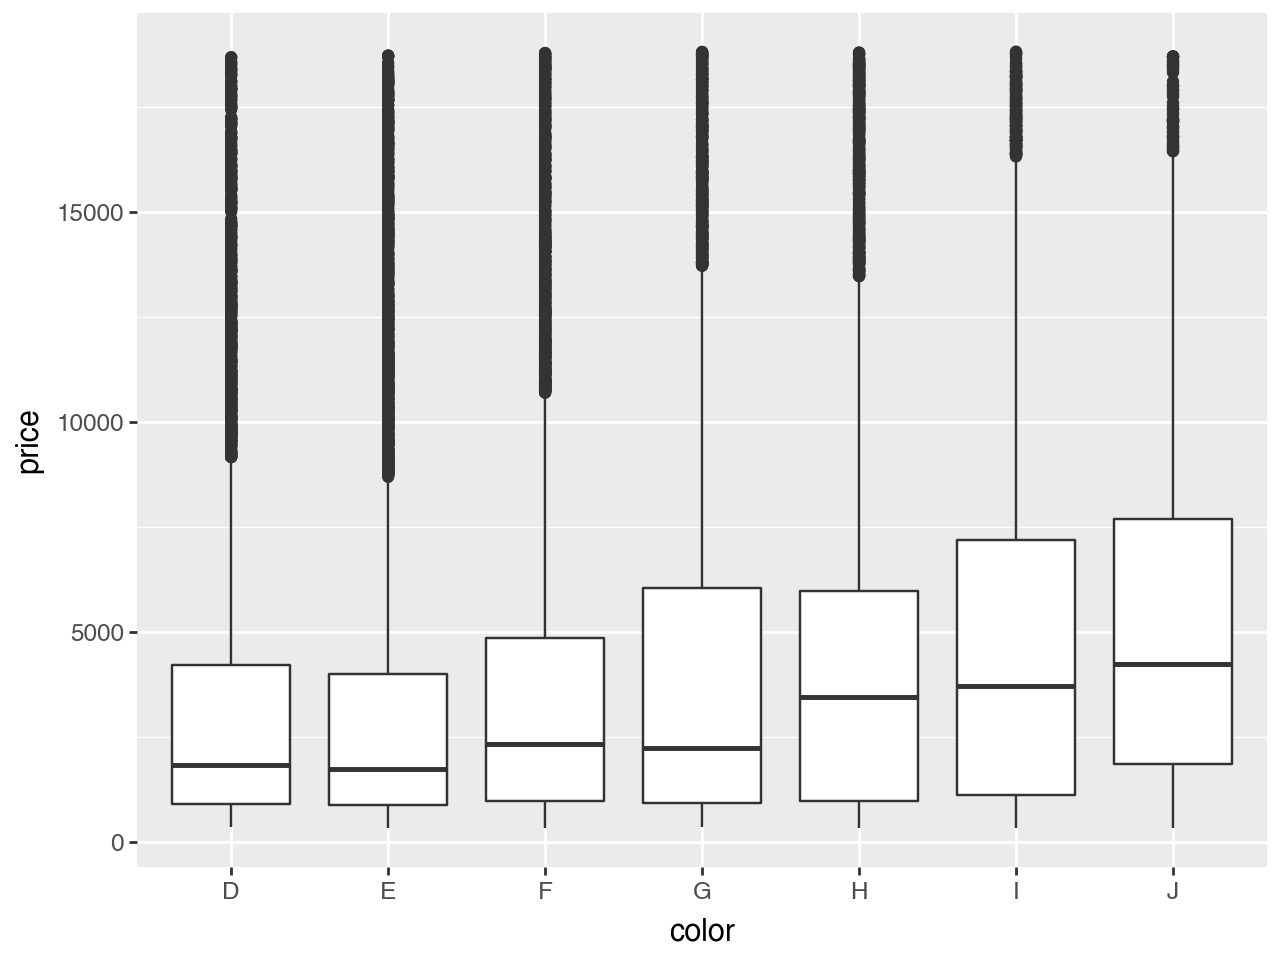

In [5]:
ggplot(diamonds, aes(x='color', y='price')) + geom_boxplot()

* Με το seaborn:

<Axes: xlabel='color', ylabel='price'>

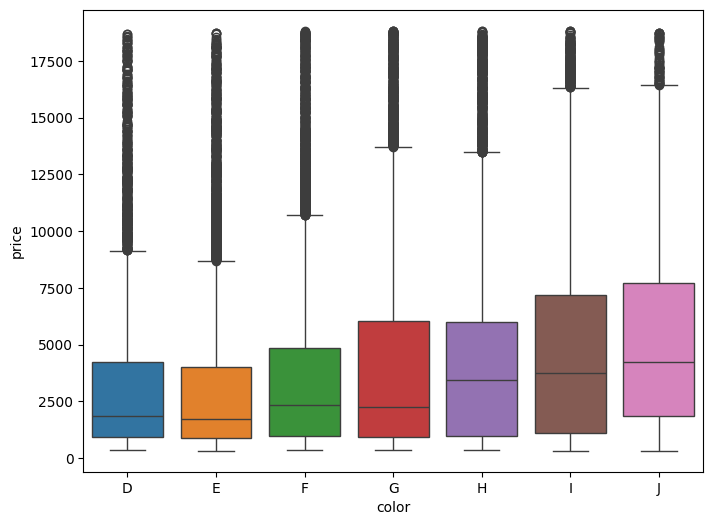

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='color', y='price', hue='color', data=diamonds)

* Ένα άλλο χαρακτηριστικό που αποτιμάται στα διαμάντια είναι η καθαρότητά τους.

* Η κλίμακα είναι από το I1 (χειρότερη), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (καλύτερη).

* Και πάλι, μεγαλύτερη καθαρότητα αντιστοιχεί σε χαμηλότερες τιμές.

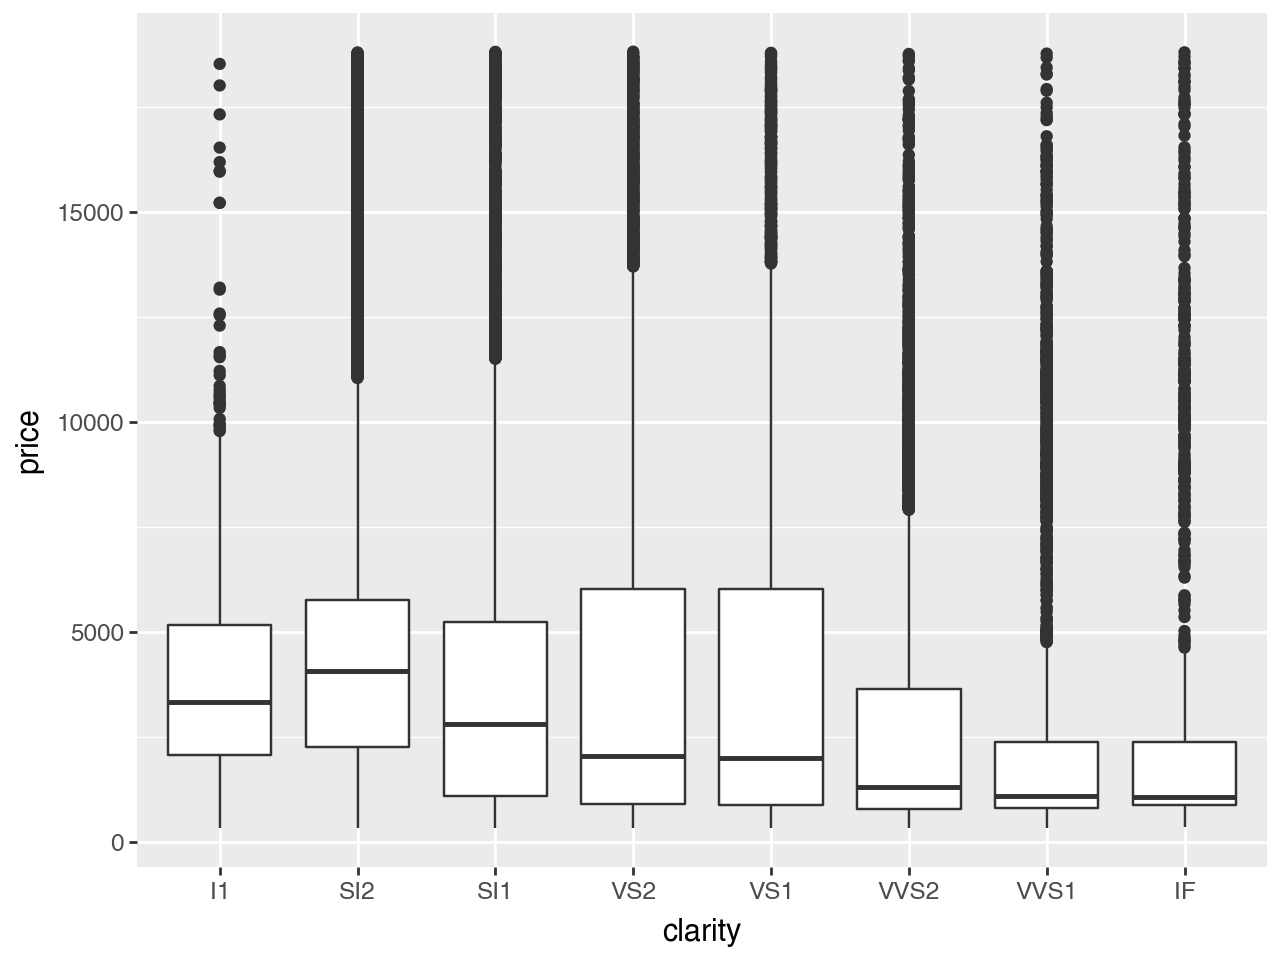

In [7]:
ggplot(diamonds, aes(x='clarity', y='price')) + geom_boxplot()

* Με το seaborn:

<Axes: xlabel='clarity', ylabel='price'>

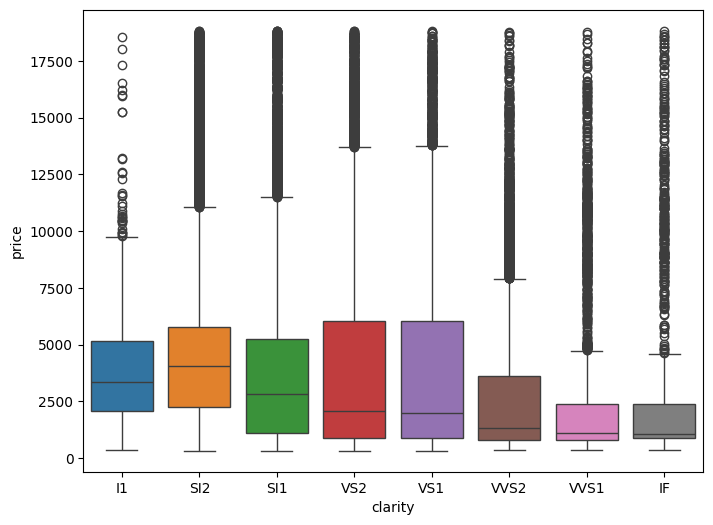

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='clarity', y='price', hue='clarity', data=diamonds)

* Τα παραπάνω ευρήματα μπορούν να εξηγηθούν αν λάβουμε υπόψη μας ότι η μεταβλητή `carat` είναι ένας *συγχυτικός παράγοντας* (confounding factor).

* Η τιμή της `carat`, που αντιστοιχεί στο βάρος, μπορεί να είναι πολύ σημαντικός παράγοντας στην τιμή του διαμαντιού, και δεν την έχουμε λάβει υπόψη.

* Μπορούμε να διερευνήσουμε τη σχέση μεταξύ των δύο με ένα διάγραμμα εξαγώνων (hexbin diagram), ή ίσως καλύτερα *κυψελόγραμμα*.

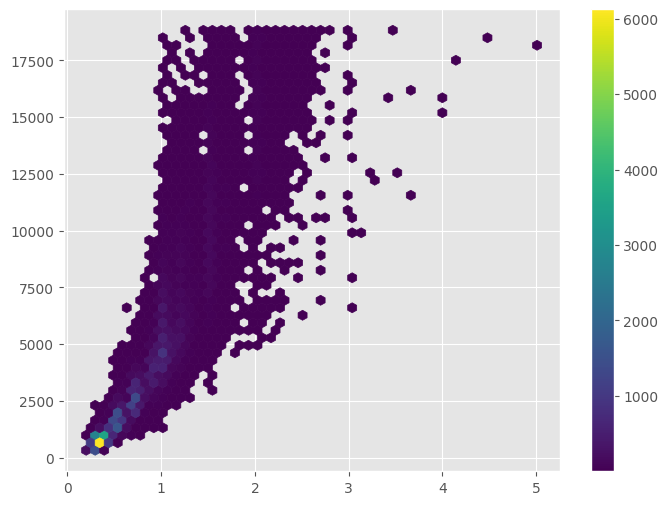

In [9]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds['carat'], y=diamonds['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)

* Βλέπουμε ότι τα περισσότερα διαμάντια ζυγίζουν λιγότερο από 2,5 καράτια.

* θα στρέψουμε λοιπόν την προσοχή μας σε αυτά. Επίσης θα πάρουμε τους λογαρίθμους των μεταβλητών και θα δούμε αν προκύπτει κάποια σχέση.

* Στην πληροφορική χρησιμοποιούμε συχνά το λογάριθμο με βάση δύο, που τον συμβολίζουμε με $\lg(x)$.

* Ο λογάριθμος με βάση το δύο έχει επίσης το πλεονέκτημα ότι είναι εύκολος στην ερμηνία, όπως θα δούμε στη συνέχεια.

In [10]:
diamonds_log2 = diamonds.query('carat <= 2.5').sort_values(by='carat').copy()
diamonds_log2['price'] = np.log2(diamonds_log2['price'])
diamonds_log2['carat'] = np.log2(diamonds_log2['carat'])

* Τώρα το διάγραμμα εξαγώνων δείχνει ξεκάθαρα μια γραμμική σχέση.

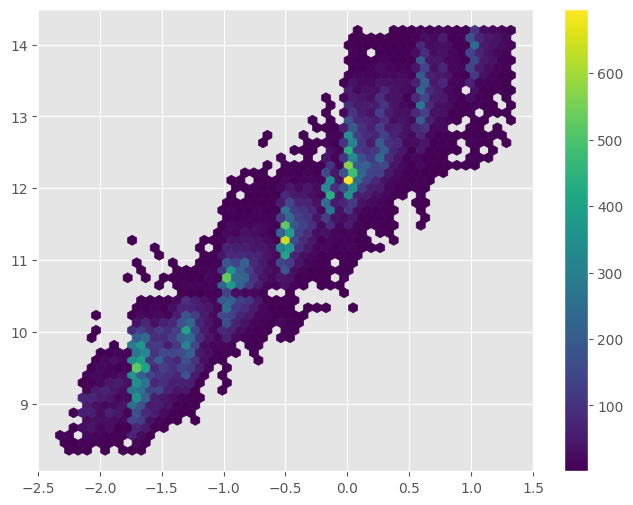

In [11]:
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], gridsize=50, mincnt=1)
fig.colorbar(hb)

* Μπορούμε λοιπόν να τρέξουμε μια γραμμική παλινδόμηση στα λογαριθμισμένα δεδομένα μας.

* Θα δούμε ότι θα πάρουμε ένα πολύ καλό $R^2$.

In [12]:
diamonds_mod = smf.ols("price ~ carat", data=diamonds_log2)
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:42:39   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1939      0.002   6194.469      0.000      12.190      12.198
carat          1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.347
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Στην πραγματικότητα δεν χρειάζεται να λογαριθμίσουμε πριν από την κατασκευή του μοντέλου μας. 

* Μπορούμε να ορίσουμε τον λογάριθμο μέσα στον τύπο του μοντέλου. Το αποτέλεσμα είναι ακριβώς το ίδιο.

In [13]:
diamonds_mod = smf.ols("np.log2(price) ~ np.log2(carat)", 
                       data=diamonds.query('carat <= 2.5'))
diamonds_res = diamonds_mod.fit()
diamonds_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log2(price)   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                 7.542e+05
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        22:42:39   Log-Likelihood:                -23824.
No. Observations:               53814   AIC:                         4.765e+04
Df Residuals:                   53812   BIC:                         4.767e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         12.1939      0.002   6194.469      0.000      12.190      12.198
np.log2(carat)     1.6814      0.002    868.451      0.000       1.678       1.685
==============================================================================
Omnibus:                      777.755   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.432
Skew:                           0.104   Prob(JB):                    6.97e-293
Kurtosis:                       3.746   Cond. No.                         1.90
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Τα αποτελέσματα της παλινδρόμησης δείχνουν ότι:

$$ \lg(\mathrm{price}) = 12{,}1939 + 1{,}6814\lg(\mathrm{carat}) $$

* Ο λογάριθμος της τιμής ενός διαμαντιού που ο λογάριθμος του βάρος του είναι μηδέν, $\lg(\mathrm{carat}) = 0$, δηλαδή $\mathrm{carat} = 1$, θα είναι $12{,}1939$.

* Άρα η τιμή αυτού του διαμαντιού θα είναι $2^{12{,}1939} \approx \$4700$. 

* Για κάθε μονάδα που αυξάνεται ο λογάριθμος του βάρους $\lg(\mathrm{carat})$, ο λογάριθμος της τιμής του διαμαντιού αυξάνεται κατά $1{,}6814$.

* Άρα, κάθε φορά που διπλασιάζεται το βάρος, η τιμή του διαμαντιού πολλαπλασιάζεται με $2^{1{,}6814}$.

* Αφαιρώντας τους λογαρίθμους, η σχέση γίνεται:

$$ \mathrm{price} = 2^{12{,}1939}  \times \mathrm{carat}^{1{,}6814}  $$

* Η τεταγμένη και η κλίση που βρήκαμε ορίζουν μια ευθεία η οποία διασχίζει τα δεδομένα ακριβώς στη μέση.

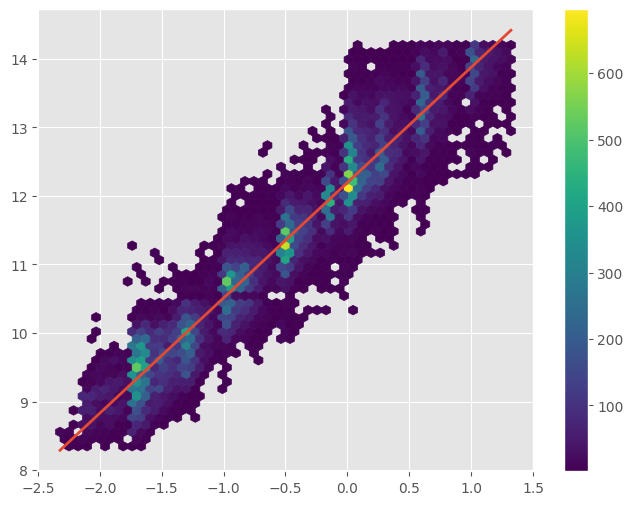

In [14]:
fig = plt.figure(figsize=(8, 6))
hb = plt.hexbin(diamonds_log2['carat'], y=diamonds_log2['price'], gridsize=50, mincnt=1)
x = diamonds_log2['carat']
y = diamonds_res.params['Intercept'] + diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat']
plt.plot(x, y, linewidth=2)
fig.colorbar(hb)

* Εκθετοποιώντας ώστε να αφαιρεθούν οι λογάριθμοι, μπορούμε να φτιάξουμε το αντίστοιχο διάγραμμα στην αρχική μας, μη λογαριθμική κλίμακα.

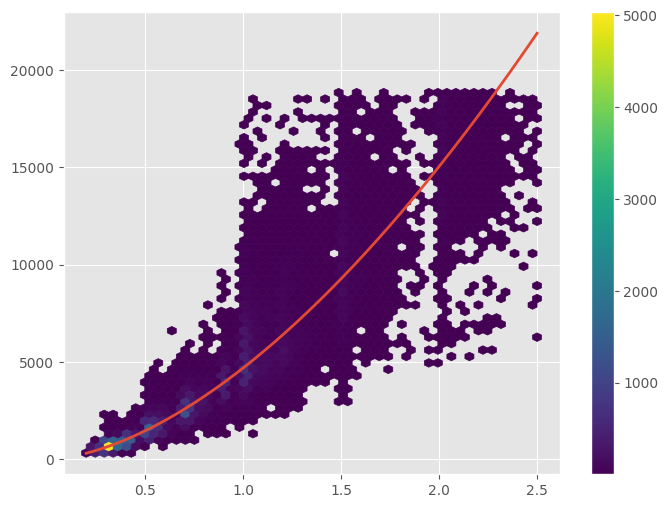

In [15]:
fig = plt.figure(figsize=(8, 6))
x = 2**diamonds_log2['carat']
y = 2**diamonds_log2['price']
hb = plt.hexbin(x=x, y=y, gridsize=50, mincnt=1)
y = 2**(diamonds_res.params['Intercept'] + (diamonds_res.params['np.log2(carat)'] * diamonds_log2['carat']))
plt.plot(x, y, linewidth=2)
fig.colorbar(hb)

* Μπορούμε να ελέγξουμε την ποιότητα της παλινδρόμησης με το διάγραμμα υπολοίπων.

* Πρώτα, με το ggplot.

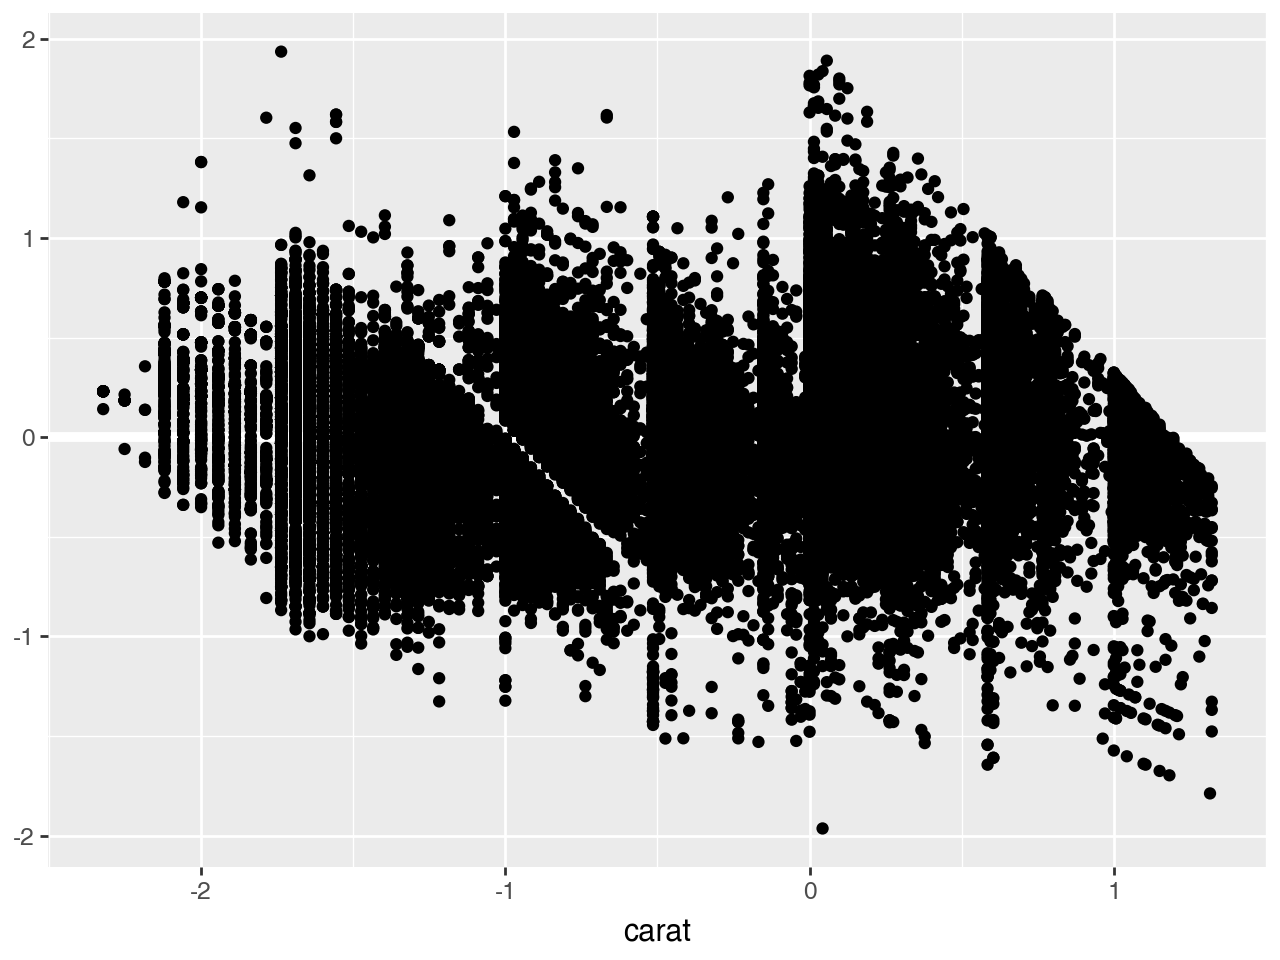

In [16]:
ggplot(data=diamonds_log2) +\
    geom_hline(yintercept=0, color='white', size=2) +\
    geom_point(mapping=aes(x='carat', y=diamonds_res.resid))

* Και με το seaborn, κατ' ευθείαν (του δίνουμε τα δεδομένα και τρέχει το ίδιο την παλινδρόμηση).

<Axes: xlabel='carat', ylabel='price'>

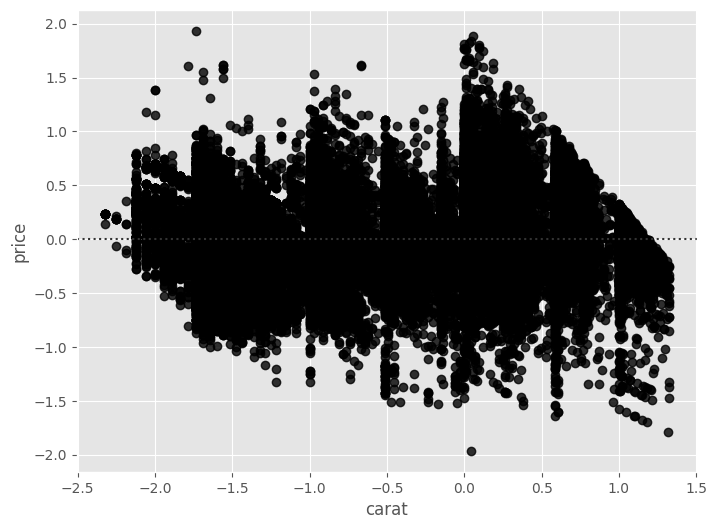

In [17]:
plt.figure(figsize=(8, 6))
sns.residplot(x='carat', y='price', data=diamonds_log2, color='k')

* Ας επιστρέψουμε στα αρχικά παράδοξα.

* Μπορούμε τώρα να φτιάξουμε θηκογράμματα με τα *υπόλοιπα* και τους παράγοντες που εξετάσαμε στην αρχή.

* Θυμηθείτε ότι τα υπόλοιπα αντιπροσωπεύουν αυτό το οποίο δεν πρόβλεψε, άρα δεν εξήγησε η ανεξάρτητη μεταβλητή.

* Άρα, στην περίπτωσή μας τα υπόλοιπα αντιπροσωπεύουν το μέρος της τιμής των διαμαντιών που δεν μπορεί να εξηγηθεί από το βάρος του.

* Επομένως, θα περιμένουμε τώρα να δούμε ότι το υπόλοιπο της τιμής αυξάνεται με την ποιότητα κοπής.

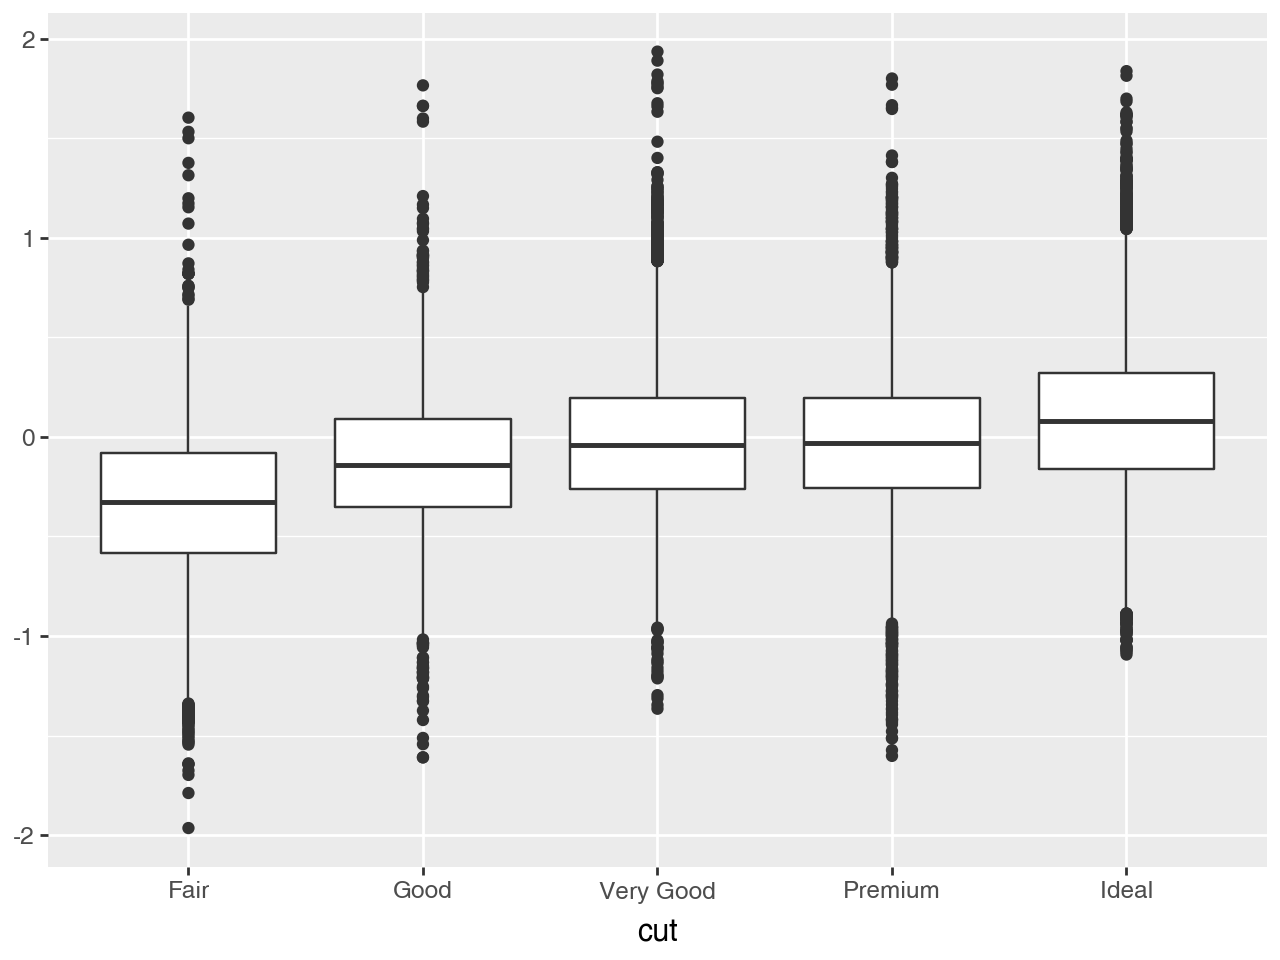

In [18]:
ggplot(data=diamonds_log2, mapping=aes('cut', diamonds_res.resid)) + geom_boxplot()

* Με το seaborn:

<Axes: xlabel='cut', ylabel='None'>

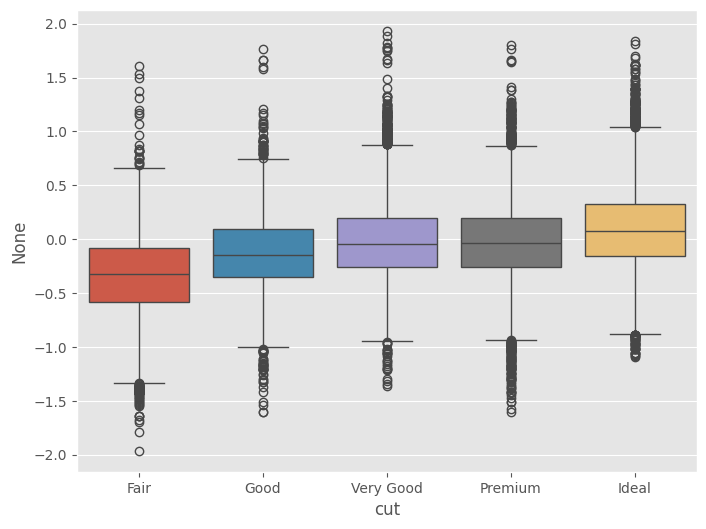

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['cut'], y=diamonds_res.resid, hue=diamonds_log2['cut'])

* Το υπόλοιπο της τιμής μειώνεται καθώς αυξάνεται το χρώμα (χειρότερη ποιότητα).

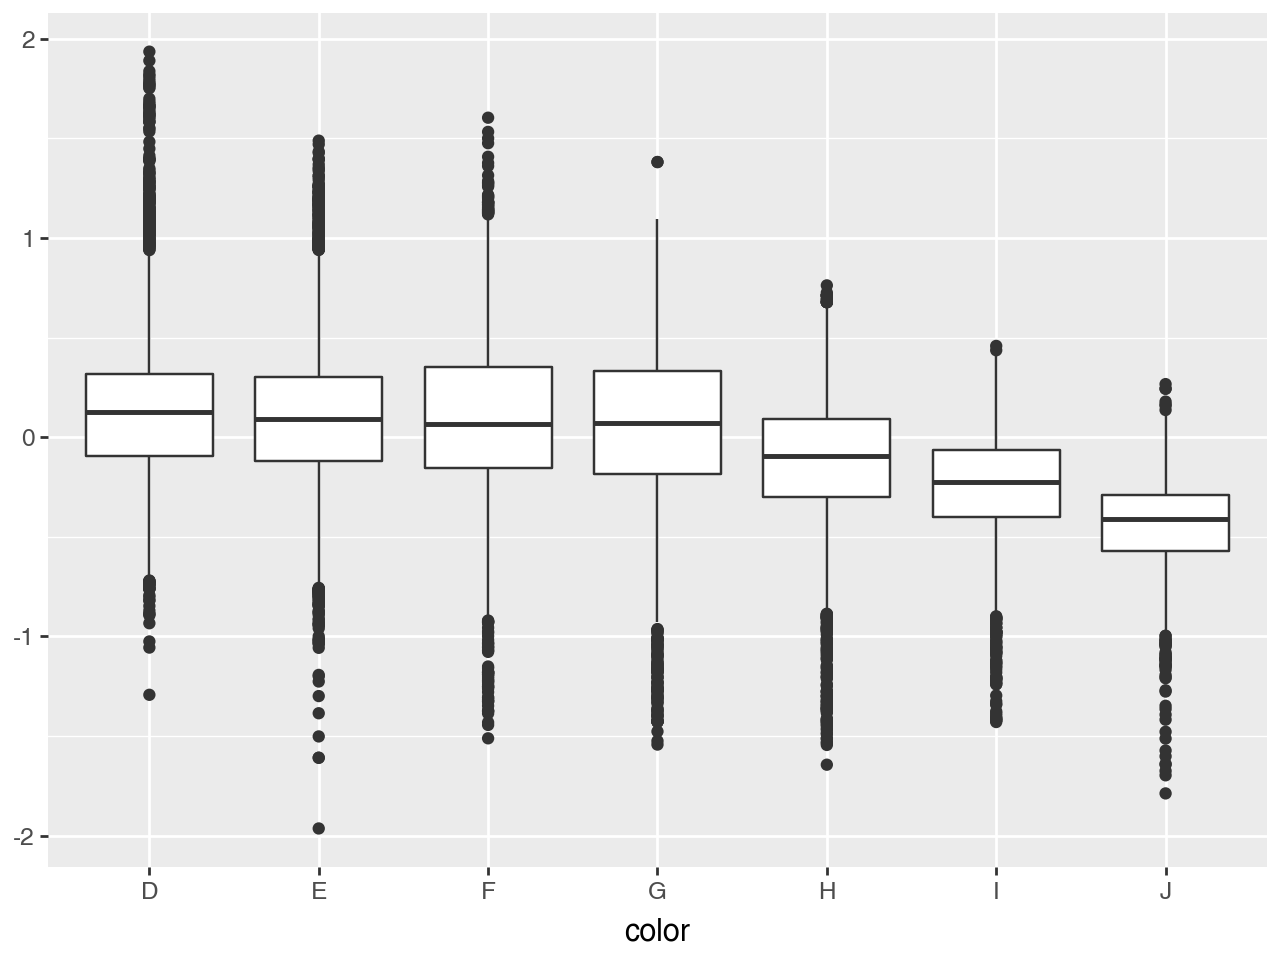

In [20]:
ggplot(data=diamonds_log2, mapping=aes('color', diamonds_res.resid)) + geom_boxplot()

* Με το seaborn:

<Axes: xlabel='color', ylabel='None'>

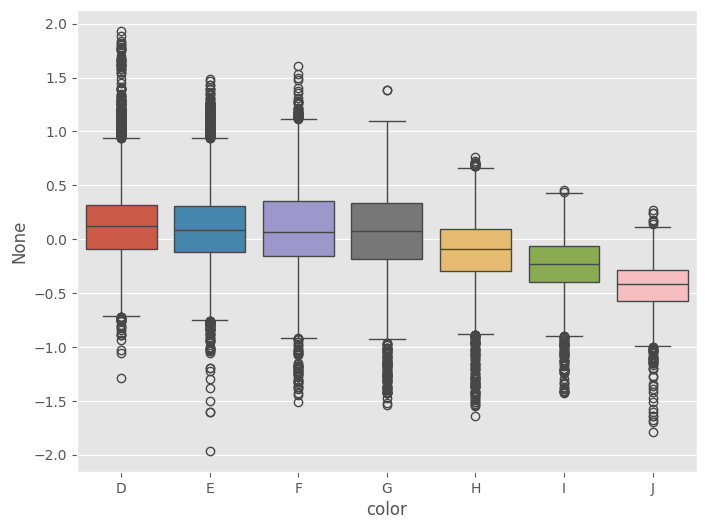

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['color'], y=diamonds_res.resid, hue=diamonds_log2['color'])

* Το υπόλοιπο της τιμής αυξάνεται όσο αυξάνεται η καθαρότητα του διαμαντιού.

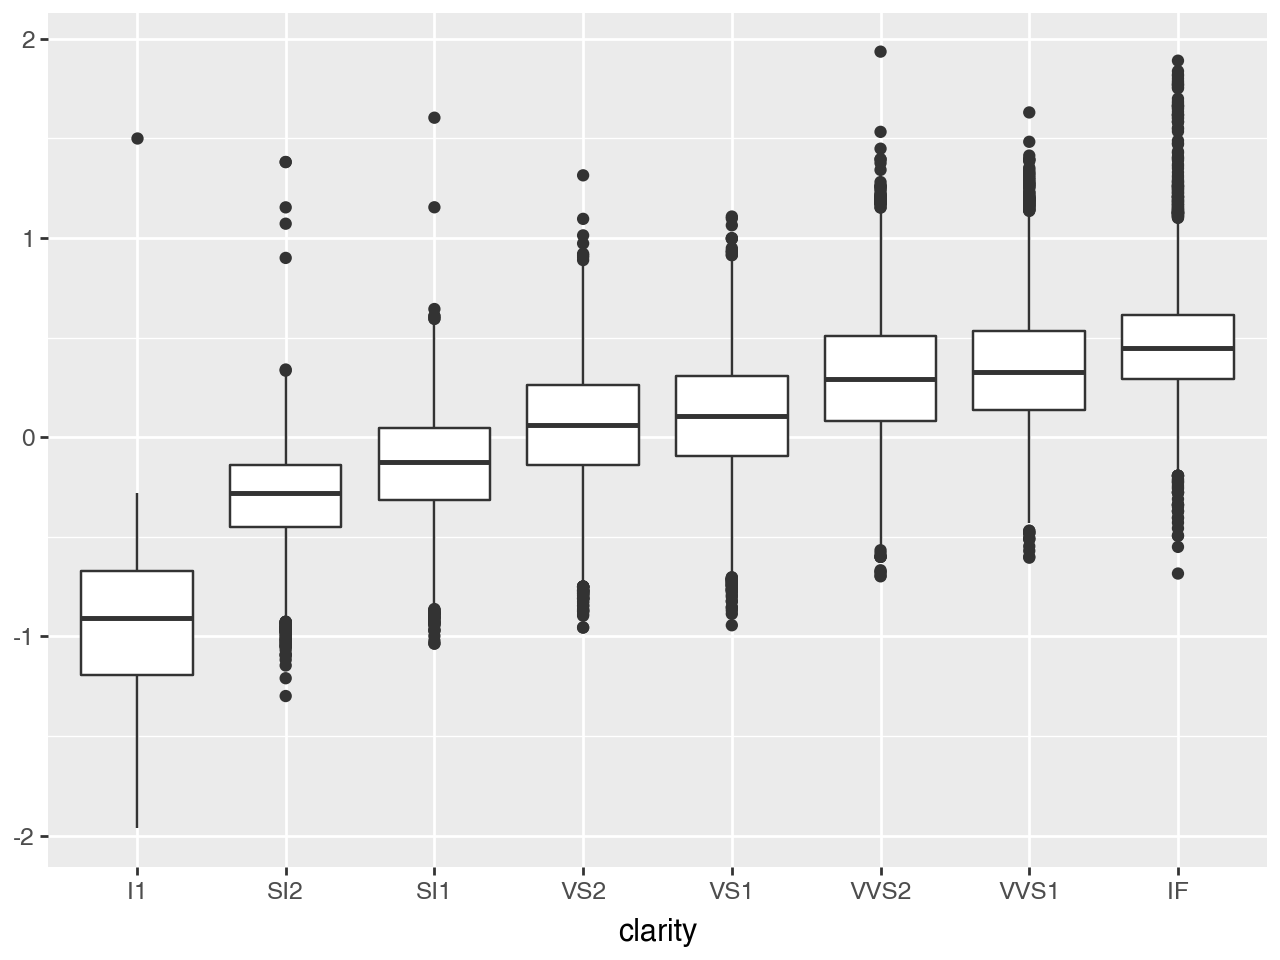

In [22]:
ggplot(data=diamonds_log2, mapping=aes('clarity', diamonds_res.resid)) + geom_boxplot()

* Με το seaborn:

<Axes: xlabel='clarity', ylabel='None'>

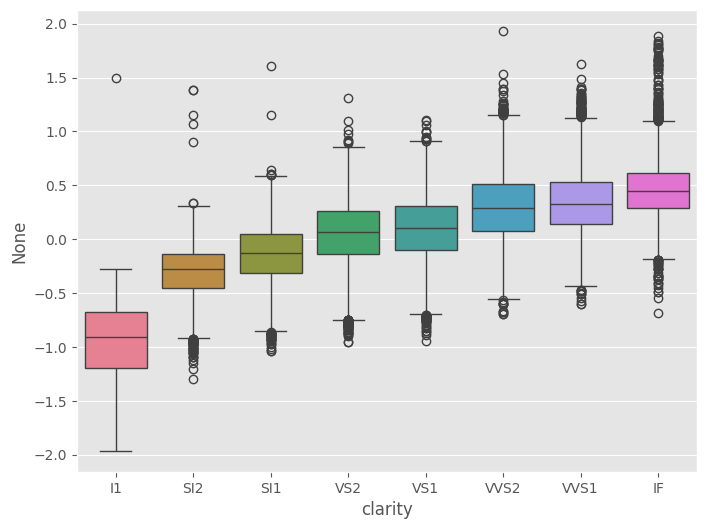

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=diamonds_log2['clarity'], y=diamonds_res.resid, hue=diamonds_log2['clarity'])

* Με τη γραμμική παλινδρόμηση μπορούμε να χειριστούμε και δεδομένα τα οποία δεν φαίνεται να έχουν γραμμική σχέση μεταξύ τους, εφαρμόζοντας την κατάλληλη μαθηματική συνάρτηση.

* Αυτό συμβαίνει όταν έχουμε μια εκθετική σχέση, την οποία με χρήση λογαρίθμων μπορούμε να μετατρέψουμε σε γραμμική.

* Στο statsmodels οι τύποι οι οποίοι δίνουμε μπορεί να περιέχουν μαθηματικές συναρτήσεις, και όχι μόνο παράθεση των εξαρτημένων μεταβλητών.

* Προσοχή στην ερμηνεία του μοντέλου!